# 1 Million Women To Tech:  Summer of Code

## Week 3 - Intro to NLP 

### Day 3 Homeworks - Cristina Tarantino

Do research to see what Python libraries are already in existence that you could start using in your day-job, or daily life.

- I often use libraries for getting url and consume apis
    - json
    - request 

In [ ]:
import json
import requests

# Exercises on WordNet

## Chapter 2 n.5

☼ Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: member_meronyms(), part_meronyms(), substance_meronyms(), member_holonyms(), part_holonyms(), and substance_holonyms().

N.B.
- **meronyms** of a noun are the noun's components. 
    - For example, the **parts of a tree** are its trunk, crown, and so on; the **part_meronyms()**
    - The **substance a tree is made of** includes heartwood and sapwood; the **substance_meronyms()**.
- **holonyms** of a noun are the category they are contained in.
    - A **collection of trees** forms a forest; the **member_holonyms()**.

In [178]:
import nltk, random
import numpy as np
import matplotlib.pyplot as plt

nltk.download("book", download_dir='./nltk_data')
nltk.download("wordnet", download_dir='./nltk_data')
nltk.data.path.append('./nltk_data')
from nltk.corpus import wordnet as wn
from nltk.corpus import brown

from collections import Counter

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to ./nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to ./nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to ./nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to ./nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to ./nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to ./nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     ./nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloading package genesis to ./nltk

In [18]:
def relations(noun):
    noun_synset = wn.synset(noun)
    print('Member Meronyms: ', noun_synset.member_meronyms())
    print('Part Meronymns: ', noun_synset.part_meronyms())
    print('Substance Meronyms: ', noun_synset.substance_meronyms())
    print('Member Holonyms: ', noun_synset.member_holonyms())
    print('Part Holonyms: ', noun_synset.part_holonyms())
    print('Substance Holonyms: ', noun_synset.substance_holonyms())

In [32]:
wn.synsets('tree')[0]
relations('tree.n.01')

Member Meronyms:  []
Part Meronymns:  [Synset('burl.n.02'), Synset('crown.n.07'), Synset('limb.n.02'), Synset('stump.n.01'), Synset('trunk.n.01')]
Substance Meronyms:  [Synset('heartwood.n.01'), Synset('sapwood.n.01')]
Member Holonyms:  [Synset('forest.n.01')]
Part Holonyms:  []
Substance Holonyms:  []


In [48]:
wn.synsets('nucleus')[0]
relations('nucleus.n.01')

Member Meronyms:  []
Part Meronymns:  [Synset('achromatin.n.01'), Synset('chromatin.n.01'), Synset('chromosome.n.01'), Synset('linin.n.01'), Synset('nucleolus.n.01')]
Substance Meronyms:  [Synset('nucleoplasm.n.01')]
Member Holonyms:  []
Part Holonyms:  [Synset('cell.n.02')]
Substance Holonyms:  []


In [54]:
wn.synsets('skin')[0]
relations('skin.n.01')

Member Meronyms:  []
Part Meronymns:  [Synset('blackhead.n.01'), Synset('dermis.n.01'), Synset('epidermis.n.01'), Synset('freckle.n.01'), Synset('free_nerve_ending.n.01'), Synset('liver_spot.n.01'), Synset('macule.n.01'), Synset('pacinian_corpuscle.n.01'), Synset('pore.n.02'), Synset('pressure_point.n.03'), Synset('scab.n.02'), Synset('skin_cell.n.01'), Synset('sweat_gland.n.01'), Synset('whitehead.n.02'), Synset('wrinkle.n.01')]
Substance Meronyms:  [Synset('melanin.n.01')]
Member Holonyms:  []
Part Holonyms:  [Synset('integumentary_system.n.01')]
Substance Holonyms:  []


# Exercises on WordNet

## Chapter 2 n.13

◑ What percentage of noun synsets have no hyponyms? You can get all noun synsets using wn.all_synsets('n').

In [81]:
# transform `wn.all_synsets('n')` in a list of all the synsets
all_syns = list(wn.all_synsets('n'))
# for ever syn in all_syns get the syn if has no hyponyms
no_hyponyms = [s for s in all_syns if len(s.hyponyms()) == 0]
print("{}%".format( round( len(no_hyponyms) / len(all_syns) * 100 )))

80%


# Exercises on WordNet

## Chapter 2 n.14

◑ Define a function supergloss(s) that takes a synset s as its argument and returns a string consisting of the concatenation of the definition of s, and the definitions of all the hypernyms and hyponyms of s.

In [105]:
def supergloss(s):
    gloss = 'Definition: ' + s.definition() + '\n\n'
    gloss += 'Hypernyms:\n'
    for hypernym in s.hypernyms():
        gloss += hypernym.name() + ': ' + hypernym.definition() + '\n'
    gloss += '\nHyponyms:\n'
    for hyponym in s.hyponyms():
        gloss += hyponym.name() + ': ' + hyponym.definition() + '\n'
    return gloss

In [106]:
print(supergloss(wn.synset('skin.n.01')))

Definition: a natural protective body covering and site of the sense of touch

Hypernyms:
body_covering.n.01: any covering for the body or a body part
connective_tissue.n.01: tissue of mesodermal origin consisting of e.g. collagen fibroblasts and fatty cells; supports organs and fills spaces between them and forms tendons and ligaments

Hyponyms:
buff.n.03: bare skin; naked
cuticle.n.01: the dead skin at the base of a fingernail or toenail
dewlap.n.01: a hanging fold of loose skin on an elderly person's neck
hangnail.n.01: a loose narrow strip of skin near the base of a fingernail; tearing it produces a painful sore that is easily infected
investment.n.04: outer layer or covering of an organ or part or organism
prepuce.n.01: a fold of skin covering the tip of the clitoris
prepuce.n.02: a fold of skin covering the tip of the penis
scalp.n.01: the skin that covers the top of the head
skin_graft.n.01: a piece of skin taken from a donor area and surgically grafted at the site of an injury 

In [107]:
wn.synsets('dna')
print(supergloss(wn.synset('deoxyribonucleic_acid.n.01')))

Definition: (biochemistry) a long linear polymer found in the nucleus of a cell and formed from nucleotides and shaped like a double helix; associated with the transmission of genetic information

Hypernyms:
polymer.n.01: a naturally occurring or synthetic compound consisting of large molecules made up of a linked series of repeated simple monomers

Hyponyms:
complementary_dna.n.01: single-stranded DNA that is complementary to messenger RNA or DNA that has been synthesized from messenger RNA by reverse transcriptase
episome.n.01: DNA that is not incorporated into the genome but is replicated together with the genome (especially in bacterial cells)
exon.n.01: sequence of a gene's DNA that transcribes into protein structures
intron.n.01: sequence of a eukaryotic gene's DNA that is not translated into a protein
junk_dna.n.01: stretches of DNA that do not code for genes
operon.n.01: a segment of DNA containing adjacent genes including structural genes and an operator gene and a regulatory 

# Exercises on WordNet

## Chapter 2 n.23

★ Zipf's Law: Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.
Write a function to process a large text and plot word frequency against word rank using pylab.plot. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?
Generate random text, e.g., using random.choice("abcdefg "), taking care to include the space character. You will need to import random first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?

In [179]:
def zipf_plot(text):
    # https://stackoverflow.com/questions/20510768/count-frequency-of-words-in-a-list-and-sort-by-frequency     
    counter_of_words = Counter(w.lower() for w in text if w.isalpha())
    counter_of_counts = Counter(counter_of_words.values())
    word_counts = np.array(list(counter_of_counts.keys()))
    freq_of_word_counts = np.array(list(counter_of_counts.values()))
    plt.scatter(np.log(word_counts), np.log(freq_of_word_counts))
#     plt.loglog(word_counts, freq_of_word_counts)
    plt.xlabel('Log of word frequency')
    plt.ylabel('Log of number of such words')
    plt.title('Power law for word frequencies')
    plt.show();

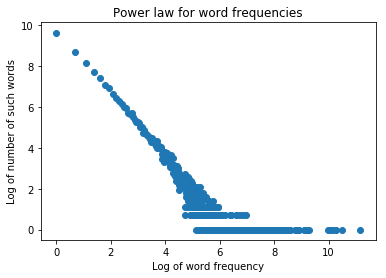

In [180]:
zipf_plot(brown.words())

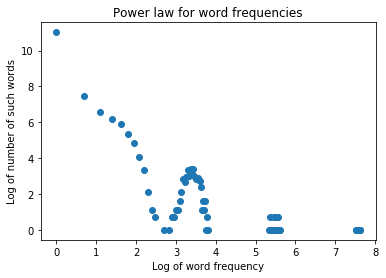

In [183]:
target_length = 1000000
random_string = ""

while len(random_string) < target_length:
    random_string += random.choice('abcdefg ')

zipf_plot(random_string.split())

In [185]:
# The conclusion is that the Zipf's Law Like Law is not a relevant when applied to concatenating random characters
# I did this exercise using this article as guideline https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2834740/